In [1]:
#TODO

"""
1. predict the unlabeled data (Naive Bayes, SVM) XGBoost
2. evaluate the accuracy ✓
3. Topic Modeling
4. wordcloud(maybe,if applicable)
5. visualization(maybe, if applicable)
6. think about some other fun questions about this data set
7. paper 
    Exploring the Use of Text Classification in the Legal Domain - arXiv
    https://arxiv.org/pdf/1710.09306
    
"""

'\n1. predict the unlabeled data (Naive Bayes, SVM)\n2. evaluate the accuracy,f1,ruc,etc?? (check with the doc later)\n3. Topic Modeling\n4. wordcloud(maybe,if applicable)\n5. visualization(maybe, if applicable)\n6. think about some other fun questions about this data set\n7. paper \n    Exploring the Use of Text Classification in the Legal Domain - arXiv\n    https://arxiv.org/pdf/1710.09306\n    \n'

In [1]:
import pandas as pd
import string 
import nltk
import re 
import numpy as np

In [2]:
# have a look on the labels' file
mapping = pd.read_csv('data/Interview_Mapping.csv')
mapping

,Judgements,Area.of.Law
0,LNIND_1988_CAL_114,To be Tested
1,LNIND_1956_CAL_163,To be Tested
2,LNIND_1976_CAL_277,To be Tested
3,LNIND_1980_CAL_52,To be Tested
4,LNIND_1955_CAL_124,To be Tested
5,LNIND_1954_CAL_3,To be Tested
6,LNIND_1951_CAL_60,To be Tested
7,LNIND_1954_CAL_46,To be Tested
8,LNIND_1976_CAL_119,To be Tested
9,LNIND_1993_DEL_120,To be Tested


In [3]:
# create labels
unlabeled = []
labeled = []
labels = []

for index,row in mapping.iterrows():
    if row['Area.of.Law'] == 'To be Tested':
        unlabeled.append(row['Judgements'])
    else: 
        labeled.append(row['Judgements'])
        labels.append(row['Area.of.Law'])
        
# how much unique area of law        
print(len(set(labels)))

41


In [4]:
# load files
import os

unlabeled_text=[]
labeled_text=[]

for name in unlabeled:
    path = os.path.join('data/',name+'.txt')
    with open(path,'r',errors = 'ignore') as f:
        unlabeled_text.append(f.read())
for name in labeled:
    path = os.path.join('data/',name+'.txt')
    with open(path,'r',errors = 'ignore') as f:
        labeled_text.append(f.read())


In [71]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop = stopwords.words('english')
punct = string.punctuation

labeled_cleaned=[]
unlabeled_cleaned = []

for passage in labeled_text:
    # remove links 
    passage= re.sub(r'http(s)?:\/\/\S*', "", str(passage))
    # remove \n
    passage = ''.join([elem.replace('\n',' ') for elem in passage])
    # normalization and remove stopwords
    passage = ' '.join([elem for elem in passage.lower().split() if elem not in stop])
    #remove punctuation 
    passage = ''.join([elem.replace('[^\w\s]',' ') for elem in passage if elem not in punct])
    #remove digits
    passage = ''.join([elem for elem in passage if not elem.isdigit()])
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    passage = ' '.join(lemmatizer.lemmatize(elem) for elem in passage.split())
    
    labeled_cleaned.append(passage)

    
for passage in unlabeled_text:
        
    # remove links 
    passage= re.sub(r'http(s)?:\/\/\S*', "", str(passage))
    # remove \n
    passage = ''.join([elem.replace('\n',' ') for elem in passage])
    # normalization and remove stopwords
    passage = ' '.join([elem for elem in passage.lower().split() if elem not in stop])
    #remove punctuation 
    passage = ''.join([elem.replace('[^\w\s]',' ') for elem in passage if elem not in punct])
    #remove digits
    passage = ''.join([elem for elem in passage if not elem.isdigit()])
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    passage = ' '.join(lemmatizer.lemmatize(elem) for elem in passage.split())

    unlabeled_cleaned.append(passage)
    # it has to be a string so it could be processed later 


In [129]:
# split the labeled data into training and validation set 
# use 7-3 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

train_text,val_text,train_labels,val_labels =train_test_split(labeled_cleaned,labels,test_size = 0.25,random_state = 0)

# do tfidf to get X_train and X_val
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_text)
X_val = vectorizer.transform(val_text)

# do tfidf to get X_test (unlabeled text that needed to be predicted)
X_test = vectorizer.transform(unlabeled_cleaned) #transform on test set, not fit_transform

# do label encoding to get y_train and y_val
encoder = LabelEncoder()
encoder.fit(labels)
y_train = encoder.transform(train_labels)
y_val = encoder.transform(val_labels)
all_labels = encoder.classes_

<225x1 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [48]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


color_mapper = {label:idx for idx,label in enumerate(set(y_val))}
color_column = [color_mapper[label] for label in y_val]
colors = ['orange','blue','red']
savepath="PCA_demo.csv"
plt.scatter(X_val[:,0], X_val[:,1], s=8, alpha=.8, c=y_val.reshape(225,1), cmap=matplotlib.colors.ListedColormap(colors))
fig = plt.figure(figsize=(16, 16))
plt.show()

In [ ]:
# graph looks kind of seperated

In [87]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report
def get_metrics(y_val, y_predicted,yHat_train,y_train):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_val, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_val, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_val, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracyTest = accuracy_score(y_val, y_predicted)
    accuracyTrain = accuracy_score(y_train,yHat_train)
    return accuracyTest,accuracyTrain, precision, recall, f1


In [90]:
# use Naive Bayes
from sklearn import naive_bayes


modelNB = naive_bayes.MultinomialNB()
modelNB.fit(X_train,y_train)
predicted_labels = modelNB.predict(X_val)
result = modelNB.predict(X_test)
print(result)

yHat_train = modelNB.predict(X_train)

accuracyTest,accuracyTrain, precision, recall, f1 = get_metrics(y_val, predicted_labels,yHat_train,y_train)
print("Test accuracy = %.3f, Train accuracy = %.3f,precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracyTest,accuracyTrain, precision, recall, f1))


[ 6  6  6  6  6  6  6  6 23  6 23  6 23 39  6  6  6 39  6  6 23 23  6  6
 39  6 23  6 39 23  6 39  6 23  6 14  6  6  6  6  6  6  6 23  6  6  6  6
 39  6  6 39 39  6  6  6  6  6  6  6 23  6  6  6  6  6  6  6  6  6  6 23
  6  6  6  6 23  6  6  6  6 23  6 39  6  6  6  6  6 23 39 23 23  6  6  6
 23  6  6  6]
Test accuracy = 0.329, Train accuracy = 0.359,precision = 0.250, recall = 0.329, f1 = 0.214
Train accuracy :  0.3590504451038576
Test accuracy :   0.3288888888888889


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [91]:
# use SVM
from sklearn import svm

modelSVM = svm.SVC(kernel='linear',C=0.1)
modelSVM.fit(X_train,y_train)
predicted_labels = modelSVM.predict(X_val)
result = modelSVM.predict(X_test)
print(result)

yHat_train = modelSVM.predict(X_train)
accuracyTest,accuracyTrain, precision, recall, f1 = get_metrics(y_val, predicted_labels,yHat_train,y_train)
print("Test accuracy = %.3f, Train accuracy = %.3f,precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracyTest,accuracyTrain, precision, recall, f1))


[ 6  6  6  6  6  6  6  6 23  6  6  6 23  6  6  6  6  6  6  6 23 23  6  6
  6  6 23  6  6  6  6  6  6 23  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6 39  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6 23  6  6  6  6  6  6  6  6  6  6  6  6 23  6 23 23  6  6  6
 23  6  6  6]
Test accuracy = 0.289, Train accuracy = 0.269,precision = 0.187, recall = 0.289, f1 = 0.182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train, y_train)

yHat_val = clf.predict(X_val)
print("Test accuracy :  ", accuracy_score(y_val, yHat_val))

Test accuracy :   0.24444444444444444


In [93]:
# use Linear Regression
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(X_train,y_train)
predicted_labels = modelLR.predict(X_val)
result = modelLR.predict(X_test)
print(result)
yHat_train = modelLR.predict(X_train)

accuracyTest,accuracyTrain, precision, recall, f1 = get_metrics(y_val, predicted_labels,yHat_train,y_train)
print("Test accuracy = %.3f, Train accuracy = %.3f,precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracyTest,accuracyTrain, precision, recall, f1))


[34  6  6 14 14  6  6 28 23  6 23  6 23 39  6 14  6 39 37  6 23 23 28  6
 39  6 23  6 39 36  6 39  6 23 34 14  1  6 14 15  6  6 13 23  6 34 14  6
 39 14 13 39 39  6  1 28  1 23  6  6 23 14 34 38 34  6  6  6  6 14  6 36
  6  6 37  6 23 14  6 14  6  7  6 39  6 39 34 37  6 23 39 23 23 14  6  6
 23  6 13  6]
Test accuracy = 0.569, Train accuracy = 0.739,precision = 0.485, recall = 0.569, f1 = 0.497


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [174]:
# write result in csv
with open('predictions.csv','w') as f:
    f.write('Judgements' + '\t' + 'Area of Law' + '\n')
    predictionList = all_labels[result]
    for i in range(0, len(result)):
        f.write(unlabeled[i] + '\t' + predictionList[i] + '\n')
        
sss = pd.read_csv('predictions.csv')
print(sss)

                   Judgements\tArea of Law
0        LNIND_1988_CAL_114\tProperty Laws
1      LNIND_1956_CAL_163\tCivil Procedure
2      LNIND_1976_CAL_277\tCivil Procedure
3    LNIND_1980_CAL_52\tCriminal Procedure
4   LNIND_1955_CAL_124\tCriminal Procedure
..                                     ...
95     LNIND_1980_CAL_279\tCivil Procedure
96          LNIND_1980_CAL_229\tIncome Tax
97     LNIND_1988_CAL_232\tCivil Procedure
98       LNIND_1957_CAL_142\tCriminal Laws
99     LNIND_1988_CAL_107\tCivil Procedure

[100 rows x 1 columns]


In [103]:
def get_most_important_features(Vectorizer, model, n=5):
    index_to_word = {v:k for k,v in Vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes



In [104]:

importance_tfidf = get_most_important_features(vectorizer,modelLR,10)


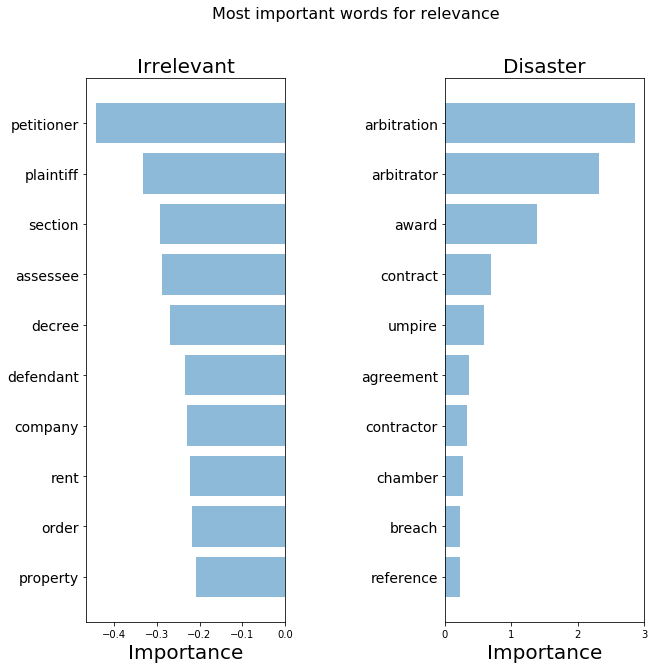

In [106]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [113]:
#try bag of word then tfidf

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer


train_text,val_text,train_labels,val_labels = train_test_split(labeled_cleaned,labels,test_size = 0.25,random_state = 0)
X_train_count, count_vectorizer = cv(train_text)
X_val_count = count_vectorizer.transform(val_text)

# do tfidf to get X_test (unlabeled text that needed to be predicted)
X_test = count_vectorizer.transform(unlabeled_cleaned) #transform on test set, not fit_transform


In [123]:
#then do tfidf transformer to make training set and valid. set from occurences to freq.
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
X_val_tfidf = tfidf_transformer.transform(X_val_count)

X_train_tfidf.shape


(674, 30995)

In [126]:
modelLR = LogisticRegression()
modelLR.fit(X_train_tfidf,y_train)
predicted_labels = modelLR.predict(X_val_tfidf)
result = modelLR.predict(X_test)
print(result)
yHat_train = modelLR.predict(X_train_tfidf)

accuracyTest,accuracyTrain, precision, recall, f1 = get_metrics(y_val, predicted_labels,yHat_train,y_train)
print("Test accuracy = %.3f, Train accuracy = %.3f,precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracyTest,accuracyTrain, precision, recall, f1))


[34  6  6  8  6  6  6 28 23  6 23  6 23 39  6 14  6 39 37  6 23 23 37  6
 39  6 23  8 39 36 36 39  6 23 34 14  1 11 14 15  6  6 13 36  6 34 14  6
 39  6 13 39 39  6  1  6  1  6  6  6 34  6 34 38 34  6  6  8  6 14  6 36
  6  6 37  6 23 14  8 14  6  7  6 39  6 39 34 37  6 23 39 23 23 14  6 16
 23  6 14  6]
Test accuracy = 0.569, Train accuracy = 0.739,precision = 0.485, recall = 0.569, f1 = 0.497


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf',TfidfTransformer()),('clf', SGDClassifier(loss='hinge', penalty='l2',
                           alpha=1e-3, random_state=42,
                           max_iter=5, tol=None)),
 ])


In [138]:
text_clf.fit(train_text, y_train)  



'predicted_ed = text_clf.predict(X_test)\nnp.mean(predicted_ed == y_val)            '

In [143]:
predicted_ed = text_clf.predict(val_text)
np.mean(predicted_ed == y_val)            

0.6311111111111111

In [145]:
#try LR ppl
text_clf_LR = Pipeline([('vect', CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                     ('clf', LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40) ),
 ])

In [146]:
text_clf_LR.fit(train_text, y_train)  
predicted_ed2 = text_clf_LR.predict(val_text)
np.mean(predicted_ed2 == y_val)    


0.64